# Projeto: Mulheres em STEM
\

**Autora:** Carolina Queiroz de Abreu Silva

**Data:** Junho/2023

\

**Introdução.** Vivemos em uma realidade em que viéses de gênero e estereótipos culturais impedem e desencorajam a participação plena e efetiva de mulheres nas áreas STEM (do inglês, Ciências, Tecnologia, Engenharia e Matemática) - historicamente dominadas por homens. Além disso, as mulheres ainda ocupam poucos cargos de liderança nas suas respectivas áreas de formação - mesmo sendo igualmente qualificadas. Desse modo, entender como a participação feminina em STEM tem evoluído ao longo do tempo e no mundo todo permite a elaboração de políticas para atrair e reter mais mulheres nessas áreas. Construir ambientes de trabalho mais diversos e representativos também fomenta a cultura da inovação e criatividade, coibindo comportamentos tóxicos e violentos e proporcionando oportunidades de carreira igualitárias tanto para mulheres quanto para homens.

\

**Motivação.** Estudar a representação feminina em aprendizagem de máquina (machine learning) e ciência de dados.

\

**Objetivo geral.** Analisar o conjunto de dados escolhido para demonstrar uma aplicação de Python em ciência de dados. Ferramentas utilizadas nessa análise: de visualização, matriz de correlação e nuvem de palavras.

\

**Objetivos de Desenvolvimento Sustentável (ODS) atendidos:** fomentar o acesso à educação inclusiva, equitativa e de qualidade; promover a igualdade de gênero; reduzir as desigualdades na área de STEM; apoiar o desenvolvimento tecnológico, a pesquisa e a inovação.

\

**Dados.** Baseado na pesquisa sobre a representação feminina em aprendizagem de máquina e ciência de dados realizada pela Kaggle em 2019 ("2019 Kaggle ML and DS Survey") disponível em:
https://www.kaggle.com/code/parulpandey/geek-girls-rising-myth-or-reality/notebook (acesso em 08/06/2023).

Essa pesquisa teve 19917 participantes (entre homens e mulheres) de 171 países diferentes.

Principais variáveis de interesse: gênero - país - idade - nível de escolaridade - cargo atual ou mais recente - salário

\

**Arquivos de entrada:**


*   multiple_choice_responses.csv
*   fenix.png

#1. Preparando os dados e importando os módulos necessários

Garantindo o acesso de arquivos presentes no Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Definindo o diretório de trabalho de onde os arquivos serão lidos e armazenados

In [2]:
topdir = 'drive/My Drive/FATEC/Linguagens_programacao/Projeto/'

Importando bibliotecas

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy  as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

mpl.style.use('classic')

Usuário deve escolher se deseja salvar os gráficos gerados ao longo da análise

In [4]:
salva_plot = input('Deseja salvar os gráficos gerados? (S/N) ').upper()

while salva_plot != 'S' and salva_plot != 'N':
  salva_plot = input('Deseja salvar os gráficos gerados? (S/N) ').upper()

Deseja salvar os gráficos gerados? (S/N) S


Lendo dados

In [5]:
arq1 = 'multiple_choice_responses.csv'

# Verificando se o path do arquivo existe
if os.path.exists(topdir + arq1):
  df = pd.read_csv(topdir + arq1, low_memory=False)
else:
  print(f'Erro! Por favor, certifique-se de que o arquivo {arq1} esteja instalado no diretório de trabalho {topdir}.')

a) Países de origem

*   Pergunta original ('Q3'): "In which country do you currently reside?" (Em qual país você reside atualmente?)

In [6]:
# Substituindo os nomes ambíguos de países por nomes padrões

df['Q3'].replace({'United States of America':'United States',
                  'Viet Nam':'Vietnam',
                  "People 's Republic of China":'China',
                  'United Kingdom of Great Britain and Northern Ireland':'United Kingdom',
                  'Hong Kong (S.A.R.)':"Hong Kong"}, inplace=True)

b) Gênero de cada participante

*   Pergunta original ('Q2'): "What is your gender?" (Qual é o seu gênero?)

In [7]:
gen_masculino = df[df['Q2']=='Male']
gen_feminino = df[df['Q2']=='Female']

print(f'A pesquisa Kaggle de 2019 contou com {len(df)-1} participantes. Desses, {len(gen_feminino)} ({len(gen_masculino)}) se identificaram com o gênero feminino (masculino).')

A pesquisa Kaggle de 2019 contou com 19717 participantes. Desses, 3212 (16138) se identificaram com o gênero feminino (masculino).


É curioso que tenham tantos participantes homens, uma vez que, em geral, as mulheres costumam ser mais colaborativas nesse tipo de pesquisa.

#2. Top 10 dos países de origem dos participantes da pesquisa de 2019

Note que os países que menos de 50 participantes (entre mulheres e homens) foram agrupados como "Other" (Outros).

In [8]:
# Definindo o ranking
topn = 10

In [9]:
def Grafico1(cont,rotulos,cores,cor_fonte,titulo,nome_imagem):
  plt.figure(facecolor='white')
  plt.pie(cont, labels=rotulos, colors=cores, autopct='%.0f%%', textprops=dict(color=cor_fonte,fontsize=10))
  plt.title(titulo)

  if salva_plot.upper() == 'S':
    plt.savefig(topdir + nome_imagem,format='png',dpi=200,bbox_inches='tight')

  plt.show()

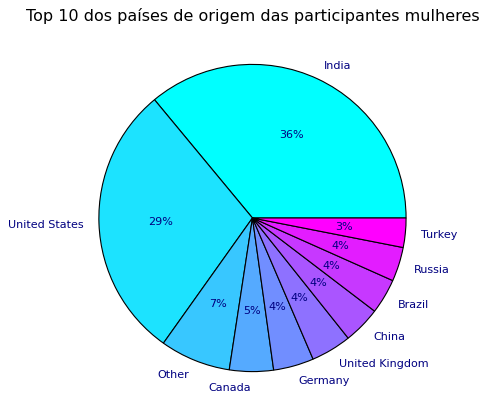

In [10]:
cont_fem = gen_feminino['Q3'].value_counts()[:topn].reset_index()
labels = cont_fem['index']
sizes = cont_fem['Q3']

# Definindo mapa de cores
cmap = plt.get_cmap('cool')
colors = [cmap(i) for i in np.linspace(0, 1, topn)]

# Gráfico 1: participantes mulheres
Grafico1(sizes,labels,colors,"navy",'Top 10 dos países de origem das participantes mulheres','Top_'+str(topn)+'_origem_participantes_mulheres.png')

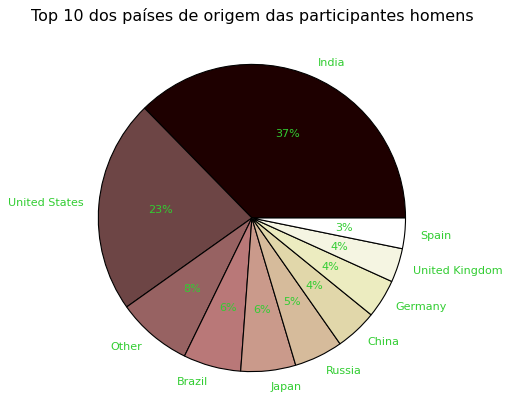

In [11]:
cont_masc = gen_masculino['Q3'].value_counts()[:topn].reset_index()
labels = cont_masc['index']
sizes = cont_masc['Q3']

# Definindo mapa de cores
cmap = plt.get_cmap('pink')
colors = [cmap(i) for i in np.linspace(0, 1, topn)]

# Gráfico 2: participantes homens
Grafico1(sizes,labels,colors,"limegreen",'Top 10 dos países de origem das participantes homens','Top_'+str(topn)+'_origem_participantes_homens.png')

Curiosamente, o Brasil aparece em quarto lugar com mais participantes homens.

**Desafios na África:** baixo número de participantes

In [12]:
# Lista de índices correspondentes aos países africanos
def Indice_africa(paises):
  ind = [np.where(paises=='Nigeria')[0],np.where(paises=='Tunisia')[0],np.where(paises=='Kenya')[0],np.where(paises=='Egypt')[0],
           np.where(paises=='Morocco')[0],np.where(paises=='South Africa')[0],np.where(paises=='Algeria')[0]]
  return(ind)

In [13]:
# Participantes mulheres
cont_fem = gen_feminino['Q3'].value_counts()[:-1].reset_index()

paises = cont_fem['index']
freq_fem = cont_fem['Q3']

# Indices com as frequências da origem africana das participantes mulheres
ind_fem = Indice_africa(paises)

In [14]:
# Participantes homens
cont_masc = gen_masculino['Q3'].value_counts()[:-1].reset_index()

paises = cont_masc['index']
freq_masc = cont_masc['Q3']

# Índices com as frequências da origem africana dos participantes homens
ind_masc = Indice_africa(paises)

In [15]:
def Grafico2(generos,paises,dados,cores,rotulos,titulo):

  X = np.arange(generos)
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])

  for i in range(paises):
    ax.bar(X+0.1*(i+1), dados[i], color = cores[i], width = 0.1, label=rotulos[i])

  plt.xlim(-0.1,1.9)
  plt.ylabel('$\mathrm{Contagem}$',fontsize=24)
  plt.tick_params(axis="x", labelsize=16)
  plt.tick_params(axis="y", labelsize=16)

  plt.xticks([])
  ax.set_xticks([0.4,1.4])
  ax.set_xticklabels(('Mulheres', 'Homens'))

  plt.legend(loc=0,prop={'size':10},numpoints=1)
  plt.title(titulo)

  if salva_plot.upper() == 'S':
    plt.savefig(topdir + 'Participantes_origem_africana.png',format='png',dpi=200,bbox_inches='tight')

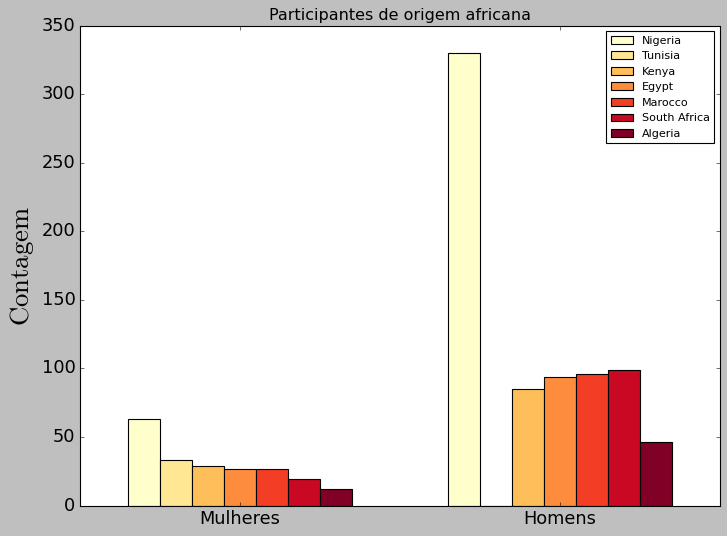

In [17]:
Npaises = 7
Ngen = 2
data = np.zeros((Npaises,Ngen))

# Frequências das mulheres
for i in range(Npaises): # número de países africanos
  if len(ind_fem[i]) == 0:
    data[i,0] = 0
  else:
    data[i,0] = freq_fem[ind_fem[i]]

# Frequências dos homens
for i in range(Npaises): # número de países africanos
  if len(ind_masc[i]) == 0:
    data[i,1] = 0
  else:
    data[i,1] = freq_masc[ind_masc[i]]

# Definindo mapa de cores
cmap = plt.get_cmap('YlOrRd')
colors = [cmap(i) for i in np.linspace(0, 1, Npaises)]

# Legenda
labels = ['Nigeria', 'Tunisia', 'Kenya', 'Egypt', 'Marocco', 'South Africa', 'Algeria']

# Gráfico
Grafico2(Ngen,Npaises,data,colors,labels,'Participantes de origem africana')

#3. Distribuição de idade das participantes mulheres

*   Pergunta original ('Q1'): "What is your age (# years)?" (Qual é a sua idade (# anos)?)

In [18]:
def Grafico3(Nage,freq,ind,cores,titulo):
  fig = plt.figure()
  ax = fig.add_axes([0,0,1,1])

  for i in range(Nage):
    ax.bar(0.1*(i+1), freq[ind[i]], color = cores[i], width = 0.1)

  plt.xlim(-0.05,1.15)
  plt.xticks([])
  ax.set_xticks(np.arange(0.1,1.1,0.1))
  ax.set_xticklabels(labels[indices])
  plt.xlabel('$\mathrm{Intervalo \ de \ idades}$',fontsize=24)
  plt.ylabel('$\mathrm{Frequencia \ (\%)}$',fontsize=24)
  plt.tick_params(axis="x", labelsize=13)
  plt.tick_params(axis="y", labelsize=16)

  plt.title(titulo)

  if salva_plot.upper() == 'S':
    plt.savefig(topdir + 'Distribuicao_idade_participantes_mulheres.png',format='png',dpi=200,bbox_inches='tight')

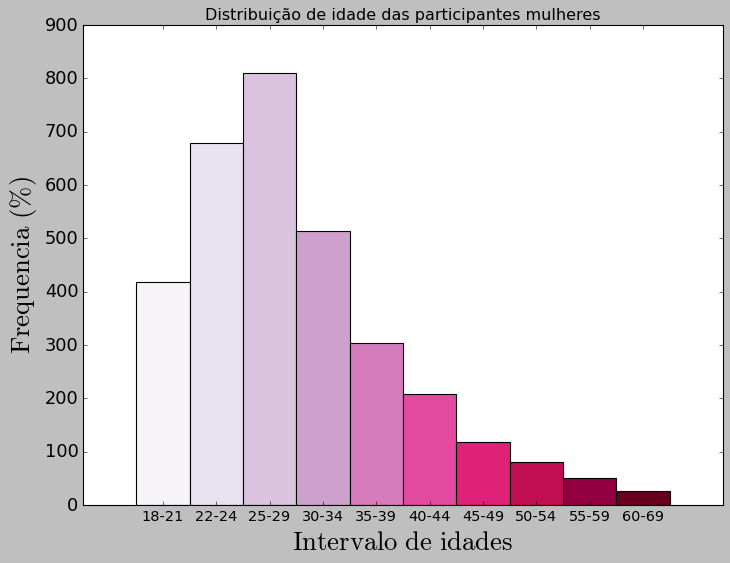

In [19]:
distrib_idade_fem = gen_feminino['Q1'].value_counts()[:-1].reset_index()

# Número de intervalos de idades
Nage = 10

# Definindo mapa de cores
cmap = plt.get_cmap('PuRd')
colors = [cmap(i) for i in np.linspace(0, 1, Nage)]

# Legenda
labels = distrib_idade_fem['index']
freq = distrib_idade_fem['Q1']

# Ordenando lista de intervalos de idades
indices = sorted(
            range(Nage),
            key = lambda index : labels[index])

# Gráfico
Grafico3(Nage,freq,indices,colors,'Distribuição de idade das participantes mulheres')

# 4. Educação

Nível de escolaridade das participantes mulheres



*   Pergunta original ('Q4'): What is the highest level of formal education that you have attained or plan to attain within the next 2 years? (Qual é o nível mais alto de educação formal que você recebeu ou planeja obter nos próximos 2 anos?)



In [20]:
def Grafico4(cont,rotulos,cores,titulo):
  #fig = plt.figure(facecolor='white')
  plt.pie(cont, labels=rotulos, colors=cores, autopct='%.0f%%', textprops=dict(color="k",fontsize=10))
  plt.title(titulo,color='k')

  if salva_plot.upper() == 'S':
    plt.savefig(topdir + 'Escolaridade_participantes_mulheres.png',format='png',dpi=200,bbox_inches='tight')

  plt.show()

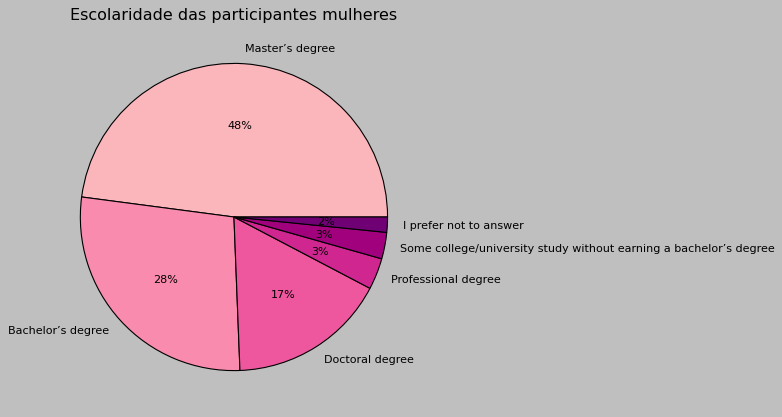

In [21]:
# Número de opções de cargos
Nopt = 6

distrib_educ_fem = gen_feminino['Q4'].value_counts()[:-1].reset_index()
labels = distrib_educ_fem['index']
sizes = distrib_educ_fem['Q4']

# Definindo mapa de cores
cmap = plt.get_cmap('RdPu')
colors = [cmap(i) for i in np.linspace(0.3, 0.9, Nopt)]

# Gráfico
Grafico4(sizes,labels,colors,'Escolaridade das participantes mulheres')

# 5. Matriz de correlação

Nesta seção, procura-se verificar se existe alguma correlação entre as principais variáveis das participantes mulheres.

<ipython-input-22-fba38893816c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fem['Q1'] = df_fem['Q1'].replace(np.nan, 0)
<ipython-input-22-fba38893816c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fem['Q3'] = df_fem['Q3'].replace(np.nan, 0)
<ipython-input-22-fba38893816c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

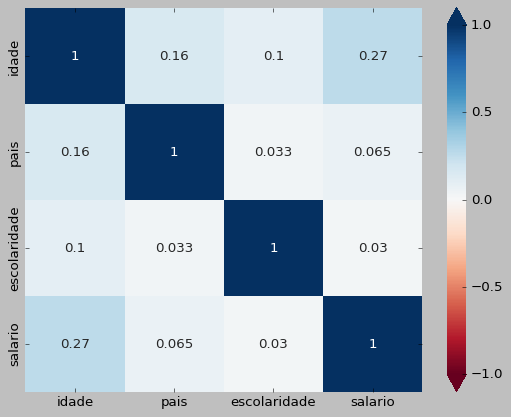

In [22]:
# Escolhendo variáveis do Data Frame de participantes mulheres: idade - país - escolaridade - salário
df_fem = gen_feminino[['Q1','Q3','Q4','Q10']]

# Note que as próximas linhas geram mensagens de aviso ('Warning'), mas o código executa as instruções solicitadas

# Substituindo NaN por zeros
df_fem['Q1'] = df_fem['Q1'].replace(np.nan, 0)
df_fem['Q3'] = df_fem['Q3'].replace(np.nan, 0)
df_fem['Q4'] = df_fem['Q4'].replace(np.nan, 0)
df_fem['Q10'] = df_fem['Q10'].replace(np.nan, 0)

# Convertendo o tipo dos dados para "category" para poder calcular a matriz de correlação
df_fem['Q1'] = df_fem['Q1'].astype('category').cat.codes
df_fem['Q3'] = df_fem['Q3'].astype('category').cat.codes
df_fem['Q4'] = df_fem['Q4'].astype('category').cat.codes
df_fem['Q10'] = df_fem['Q10'].astype('category').cat.codes

# Matriz de correlação
df_fem.corr()

# Gráfico
x_axis_labels = ['idade', 'pais', 'escolaridade', 'salario'] # labels para eixo x
y_axis_labels = ['idade', 'pais', 'escolaridade', 'salario'] # labels para eixo y

sns.heatmap(df_fem.corr(), annot = True, vmin=-1, vmax=1, cmap='RdBu', cbar_kws={'extend': 'both'},
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)

if salva_plot.upper() == 'S':
  plt.savefig(topdir + 'Heatmap_correlacao_variaveis_participantes_mulheres.png',format='png',dpi=200,bbox_inches='tight')

**Interpretação:**


*   Correlação negativa: indica que as variáveis são inversamente proporcionais, ou seja, quando uma cresce a outra decresce e vice-versa.
*   Correlação zero: indica que o comportamento das variáveis não segue nenhum padrão aparente.
*   Correlação positiva: indica que as variáveis são diretamente proporcionais, ou seja, quando uma cresce (diminui) a outra também cresce (diminui).

Pelo gráfico nota-se que as correlações entre as grandezas selecionadas são positivas mas muito baixas (próximas de zero). As grandezas que mais parecem estar correlacionadas são a idade ('Q1') e o salário ('Q10'), o que faz sentido (apesar da correlação ser fraca) uma vez que se espera que pessoas com maior tempo de carreira recebam salários maiores.

**Conferindo:** a distribuição 2D dos salarios em função das idades é mostrada a seguir.

In [23]:
# Distribuição de idades
distrib_idade_fem = gen_feminino['Q1'].value_counts()[:-1].reset_index()
labels = distrib_idade_fem['index']
sizes = distrib_idade_fem['Q1']

# Ordenando a lista de intervalos de idades
ind_sort_idade = sorted(
            range(Nage),
            key = lambda index : labels[index])

freq_idade = sizes[ind_sort_idade]

# Mapeando os intervalos de idade em valores numéricos
lista_idade = ['18-21','22-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+']

labels_idade = gen_feminino['Q1']
for i in range(Nage+1):
  labels_idade = labels_idade.replace(lista_idade[i], i)

In [24]:
# Distribuição de salários
distrib_salario_fem = gen_feminino['Q10'].value_counts()[:-1].reset_index()
labels = distrib_salario_fem['index']
sizes = distrib_salario_fem['Q10']

# Mapeando os intervalos de salário em valores numéricos
lista_salario = ['$0-999','1,000-1,999','2,000-2,999','3,000-3,999','4,000-4,999','5,000-7,499','7,500-9,999','10,000-14,999',
                 '15,000-19,999','20,000-24,999','25,000-29,999','30,000-39,999','40,000-49,999','50,000-59,999','60,000-69,999',
                 '70,000-79,999','80,000-89,999','90,000-99,999','100,000-124,999','125,000-149,999','150,000-199,999',
                 '200,000-249,999','250,000-299,999','300,000-500,000','> $500,000']

# Número de intervalos de salário
Nsal = 24

labels_salario = gen_feminino['Q10']
labels_salario = labels_salario.replace(np.nan, -1)

for i in range(Nsal+1):
  labels_salario = labels_salario.replace(lista_salario[i], i)

freq_salario = np.zeros(Nsal+1)
for i in range(Nsal+1):
  freq_salario[i] = len(np.where(labels_salario==int(i))[0])

peso = np.zeros((Nage+1,Nsal+1))
for i in range(Nage+1):
  for j in range(Nsal+1):
    peso[i,j] = len(np.where(labels_idade==int(i))[0]) + len(np.where(labels_salario==int(j))[0])

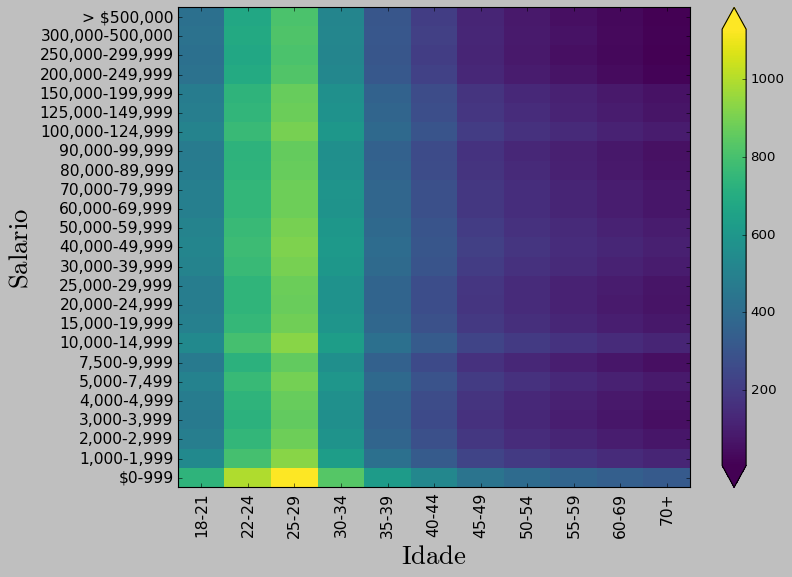

In [25]:
# Gráfico
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
imag = plt.imshow(peso.T,interpolation='nearest',origin='lower', aspect='auto', cmap='viridis')
fig.colorbar(imag, extend='both')
plt.xlabel('$\mathrm{Idade}$', fontsize=24)
plt.ylabel('$\mathrm{Salario}$', fontsize=24)
plt.tick_params(axis="x", labelsize=14)
plt.tick_params(axis="y", labelsize=14)
plt.xticks([])
ax.set_xticks(np.arange(0,Nage+1,1))
ax.set_xticklabels(lista_idade, rotation=90)
plt.yticks([])
ax.set_yticks(np.arange(0,Nsal+1,1))
ax.set_yticklabels(lista_salario)
if salva_plot.upper() == 'S':
  plt.savefig(topdir + 'Salario_vs_idade_participantes_mulheres.png',format='png',dpi=200,bbox_inches='tight')


Nota-se que a correlação entre essas variáveis é bem fraca. Existe um viés nos intervalos de idade entre 22 e 34 anos, que correspondem justamente aos intervalos com maior número de participantes mulheres.

#6. Nuvem de palavras

Nesta seção, mostra-se uma aplicação do conceito de nuvem de palavras a partir dos cargos ocupados pelas participantes que se identificaram com o gênero feminino. Como imagem de contorno, escolheu-se uma fênix, ave que simboliza o renascimento e o eterno recomeçar - características que podem ser associadas à resiliência necessária para que as mulheres dêem continuidade a suas carreiras nas áreas de STEM, mesmo quando assumem diferentes papéis (como cuidar da casa e da família).

Criando uma máscara com a imagem de uma fênix

In [26]:
arq2 = 'fenix.png'

# Verificando se o path do arquivo existe
if os.path.exists(topdir + arq2):
  mask_fenix = np.array(Image.open(topdir + arq2))
else:
  print(f'Erro! Por favor, certifique-se de que o arquivo {arq2} esteja instalado no diretório de trabalho {topdir}.')

Selecionando apenas os cargos informados pelos participantes que se identificaram com o gênero feminino.

*   Pergunta original ('Q5'): "Select the title most similar to your current role (or most recent title if retired)." (Selecione o título do cargo mais próximo da sua função atual (ou da mais recente caso tenha se aposentado.)

In [27]:
# Ignora a primeira linha do Data Frame
df1 = gen_feminino['Q5'].iloc[1:]
texto = df1.values

# Salvando a lista de cargos em um arquivo para poder formatar os valores
out = open(topdir+'texto.csv','w')
for i in texto:
  # transforma todas as letras em minusculas
  # substitui "/" por espaco; em seguida, substitui espaco por "_"
  out.write('%s '%(str(i).lower().replace('/',' ').replace(' ','_')))
out.close()

# Lendo lista de cargos com nomes editados
df2 = pd.read_csv(topdir+'texto.csv')

Criando uma lista de stopwords

In [28]:
lista_stopwords = ['student', 'nan', 'other', 'not_employed', 'x', 'columns', 'rows']

Criando uma nuvem de palavras (apesar das opções de cargos serem restritas na pesquisa)

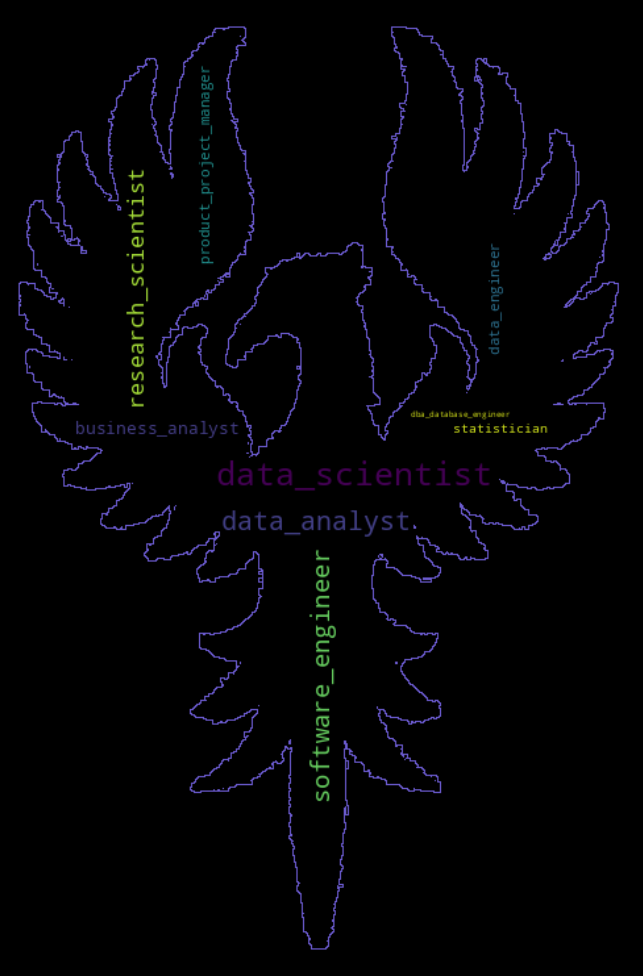

In [29]:
nuvem_palavras = WordCloud(
    collocations=False, # evita repetições nas palavras da nuvem
    mask = mask_fenix,
    background_color = 'black',
    stopwords = lista_stopwords,
    height = 250,
    width = 250,
    contour_width = 0.1, # espessura do contorno
    contour_color = 'slateblue', # cor do contorno
    colormap = 'viridis') # cores das palavras

# Gerando a nuvem de palavras
nuvem_palavras.generate(str(df2))

# Plotando e mostrando a nuvem de palavras
plt.figure(figsize = (20, 15), facecolor = 'k')
plt.imshow(nuvem_palavras, interpolation='bilinear')
plt.axis('off')
plt.show()

# Salvando a nuvem de palavras em um arquivo
if salva_plot.upper() == 'S':
  nuvem_palavras.to_file(topdir+'Nuvem_de_palavras_mulheres_em_STEM.png')

# Considerações finais

Apesar do Kaggle disponibilizar os resultados das pesquisas de anos anteriores (2017 e 2018) e uma análise conjunta desses resultados ter um maior potencial de mostrar como a representatividade feminina nas áreas de aprendizagem de máquina e ciência de dados evoluiu ao longo desse período, por simplicidade, resolveu-se utilizar e analisar apenas os dados obtidos em 2019.

Além disso, apesar do baixo número de participantes que se identificaram com o gênero feminino, foi possível analisar a distribuição de 4 variáveis principais (idade, país de origem, nível de escolaridade e salário), verificar se existia alguma correlação entre elas e gerar uma nuvem de palavras a partir dos cargos informados.

Portanto, o objetivo geral de demonstrar uma aplicação de Python em ciência de dados foi alcançado. Acredita-se que, com um conjunto de dados mais extenso, seja possível estender a análise aqui realizada para a obtenção de conclusões mais específicas.